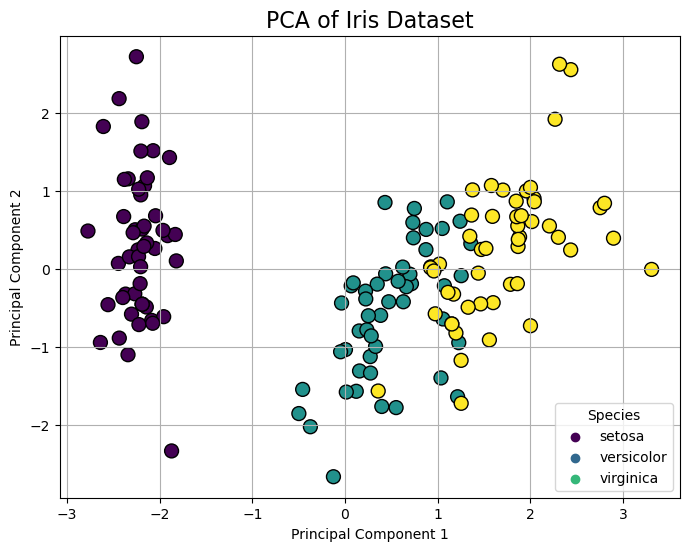

        PC1       PC2 Species
0 -2.264542  0.505704  setosa
1 -2.086426 -0.655405  setosa
2 -2.367950 -0.318477  setosa
3 -2.304197 -0.575368  setosa
4 -2.388777  0.674767  setosa


In [3]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 2: Load the Iris dataset from a URL (CSV file)
url = "iris.csv"
df = pd.read_csv(url)

# Step 3: Data Transformation (Convert columns to numeric where necessary)
df['sepal_length'] = pd.to_numeric(df['sepal_length'], errors='coerce')
df['sepal_width'] = pd.to_numeric(df['sepal_width'], errors='coerce')
df['petal_length'] = pd.to_numeric(df['petal_length'], errors='coerce')
df['petal_width'] = pd.to_numeric(df['petal_width'], errors='coerce')

# Step 4: Separate features and target variable
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = df['species']  # Target variable (species)

# Step 5: Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 6: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 7: Create a DataFrame for the 2D PCA data
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = y

# Step 8: Plot the reduced data using a scatter plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pd.Categorical(pca_df['Species']).codes, cmap='viridis', edgecolor='k', s=100)
plt.title('PCA of Iris Dataset', fontsize=16)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Create a legend for the species
species = pca_df['Species'].unique()
for i, species_name in enumerate(species):
    plt.scatter([], [], color=plt.cm.viridis(i / len(species)), label=species_name)
plt.legend(title='Species')

# Show the plot
plt.grid(True)
plt.show()

# Optional: Print the reduced dataset (2D representation)
print(pca_df.head())
